In [1]:
import pandas as pd

data = pd.read_csv('data.csv')

In [2]:
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN


In [3]:
data.shape

(2879, 11)

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Stn Code,2879.0,475.750261,277.675577,38.0,238.0,366.0,764.0,773.0
SO2,2868.0,11.503138,5.051702,2.0,8.0,12.0,15.0,49.0
NO2,2866.0,22.136776,7.128694,5.0,17.0,22.0,25.0,71.0
RSPM/PM10,2875.0,62.494261,31.368745,12.0,41.0,55.0,78.0,269.0
PM 2.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import pandas as pd

<ipython-input-6-da88f0975c8c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


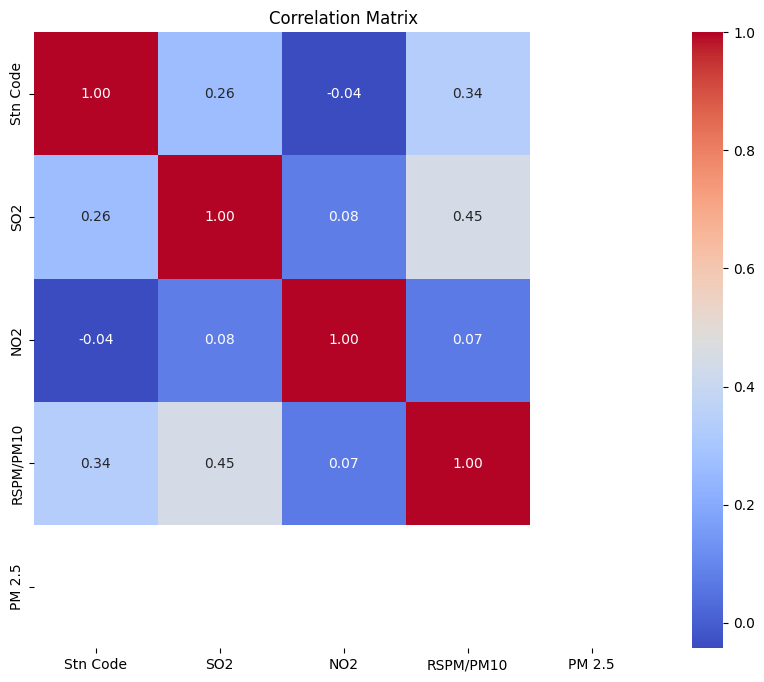

In [6]:
correlation_matrix = data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stn Code                        2879 non-null   int64  
 1   Sampling Date                   2879 non-null   object 
 2   State                           2879 non-null   object 
 3   City/Town/Village/Area          2879 non-null   object 
 4   Location of Monitoring Station  2879 non-null   object 
 5   Agency                          2879 non-null   object 
 6   Type of Location                2879 non-null   object 
 7   SO2                             2868 non-null   float64
 8   NO2                             2866 non-null   float64
 9   RSPM/PM10                       2875 non-null   float64
 10  PM 2.5                          0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 247.5+ KB


In [8]:
data.isnull().sum()

Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                 11
NO2                                 13
RSPM/PM10                            4
PM 2.5                            2879
dtype: int64

<Axes: >

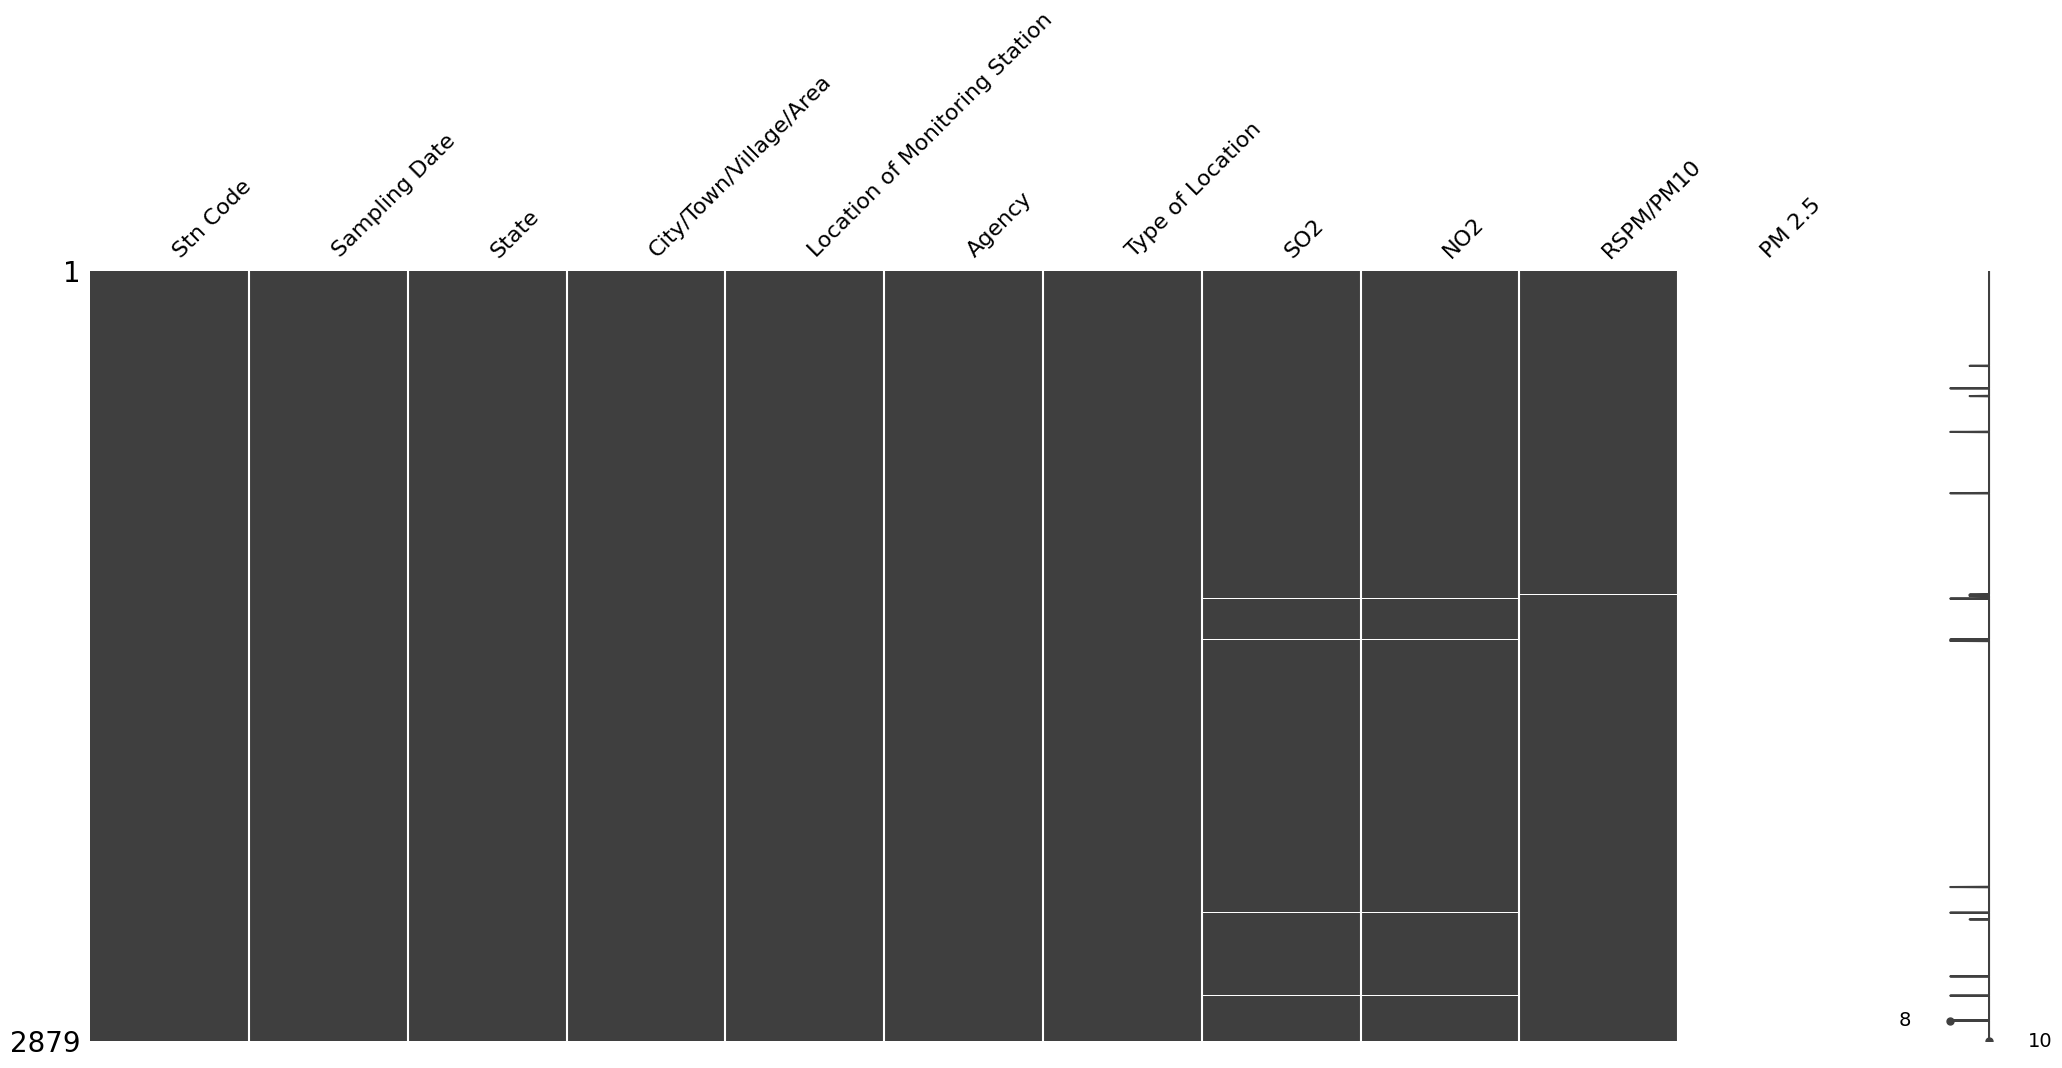

In [9]:
import missingno as msno
msno.matrix(data)


<Axes: >

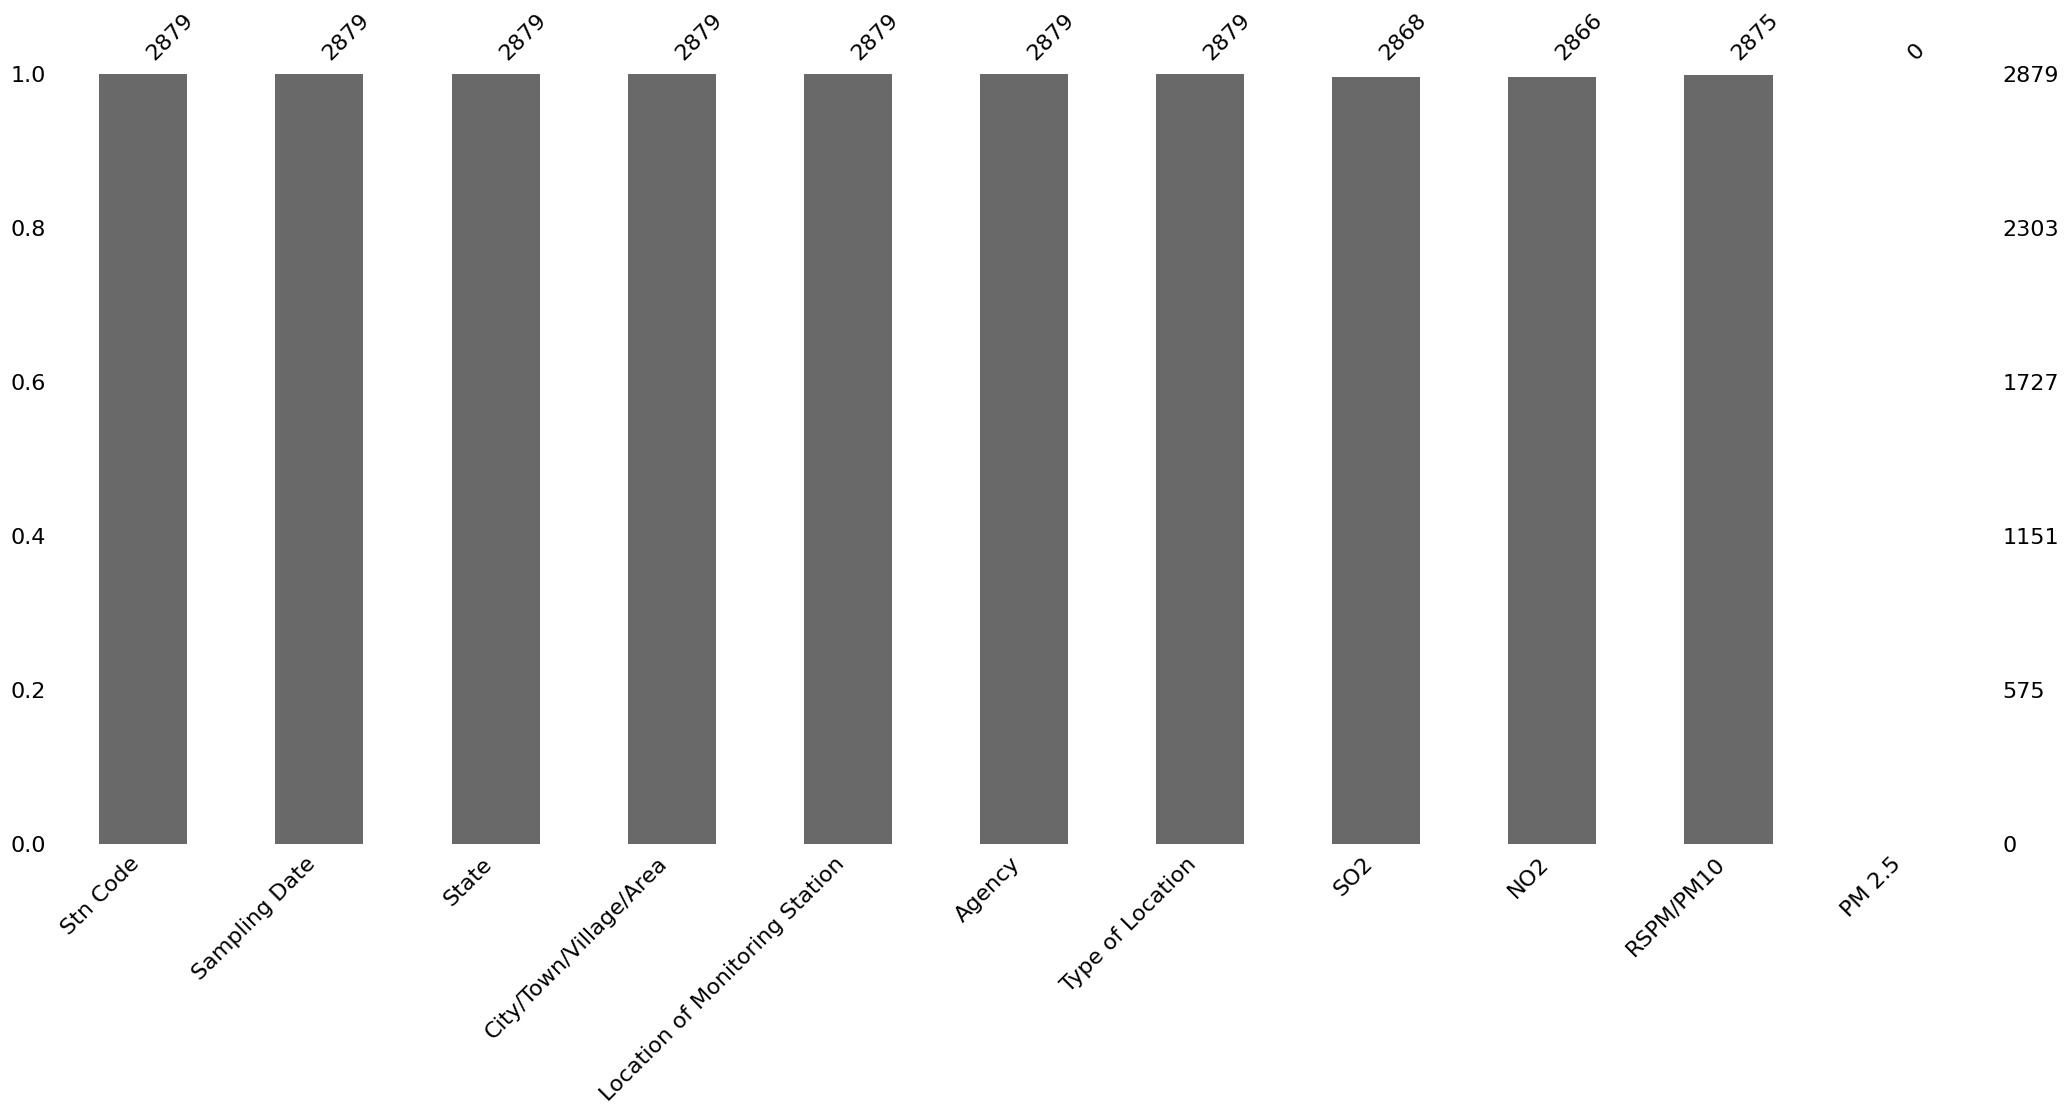

In [10]:
msno.bar(data)

In [11]:
data = pd.read_csv('data.csv')


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['SO2'] = scaler.fit_transform(data[['SO2']])


In [13]:
# Perform one-hot encoding for the 'NO2' column
data = pd.get_dummies(data, columns=['NO2'])


In [14]:
from sklearn.model_selection import train_test_split

# Define the target variable (y)
y = data['PM 2.5']  # Assuming "PM 2.5" is the target variable

# Define features (X) by selecting relevant columns
# You can include 'SO2', 'NO2', 'RSPM/PM10', and any other relevant columns
X = data[['SO2', 'RSPM/PM10']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
data

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,RSPM/PM10,PM 2.5,...,NO2_48.0,NO2_49.0,NO2_50.0,NO2_51.0,NO2_52.0,NO2_53.0,NO2_54.0,NO2_55.0,NO2_69.0,NO2_71.0
0,38,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,0.191489,55.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,38,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,0.234043,45.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,0.212766,50.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,0.276596,46.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,0.234043,42.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,773,12-03-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",0.276596,102.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2875,773,12-10-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",0.212766,91.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2876,773,17-12-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",0.361702,100.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2877,773,24-12-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",0.276596,95.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Data preprocessing steps (handle missing values, encoding, etc.)

# Select relevant features from your dataset
X = data[['SO2', 'RSPM/PM10']]

# Define the target variables
y_so2 = data['SO2']
y_rspm_pm10 = data['RSPM/PM10']

# Split data into training and testing sets for SO2
X_train_so2, X_test_so2, y_train_so2, y_test_so2 = train_test_split(X, y_so2, test_size=0.2, random_state=42)

# Split data into training and testing sets for RSPM/PM10
X_train_rspm_pm10, X_test_rspm_pm10, y_train_rspm_pm10, y_test_rspm_pm10 = train_test_split(X, y_rspm_pm10, test_size=0.2, random_state=42)


In [18]:
X.isnull().sum()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_so2 = imputer.fit_transform(X_train_so2)
X_train_rspm_pm10 = imputer.fit_transform(X_train_rspm_pm10)
import numpy as np

# Convert Pandas Series to NumPy array and reshape for SO2
y_train_so2 = np.array(y_train_so2).reshape(-1, 1)

# Convert Pandas Series to NumPy array and reshape for RSPM/PM10
y_train_rspm_pm10 = np.array(y_train_rspm_pm10).reshape(-1, 1)

# Impute missing values in X_test_so2 and X_test_rspm_pm10 using the same imputer
X_test_so2 = imputer.transform(X_test_so2)
X_test_rspm_pm10 = imputer.transform(X_test_rspm_pm10)

y_train_so2 = imputer.fit_transform(y_train_so2)
y_train_rspm_pm10 = imputer.fit_transform(y_train_rspm_pm10)
# Impute missing values in y_test_so2 and y_test_rspm_pm10 using the same imputer
import numpy as np

# Convert Pandas Series to NumPy array and reshape for SO2
y_test_so2 = y_test_so2.values.reshape(-1, 1)

# Convert Pandas Series to NumPy array and reshape for RSPM/PM10
y_test_rspm_pm10 = y_test_rspm_pm10.values.reshape(-1, 1)

y_test_so2 = imputer.transform(y_test_so2)
y_test_rspm_pm10 = imputer.transform(y_test_rspm_pm10)


In [24]:

# Create and train models for SO2
model_so2 = LinearRegression()
model_so2.fit(X_train_so2, y_train_so2)

# Make predictions
y_pred_so2 = model_so2.predict(X_test_so2)


# Evaluate models for SO2
r2_so2 = r2_score(y_test_so2, y_pred_so2)
mae_so2 = mean_absolute_error(y_test_so2, y_pred_so2)
mse_so2 = mean_squared_error(y_test_so2, y_pred_so2)
rmse_so2 = np.sqrt(mse_so2)

# Print evaluation metrics for SO2
print("SO2 Model Evaluation:")
print(f"R-squared (R2): {r2_so2:.4f}")
print(f"Mean Absolute Error (MAE): {mae_so2:.4f}")
print(f"Mean Squared Error (MSE): {mse_so2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_so2:.4f}")



SO2 Model Evaluation:
R-squared (R2): -0.0028
Mean Absolute Error (MAE): 0.2163
Mean Squared Error (MSE): 13.4760
Root Mean Squared Error (RMSE): 3.6710


In [20]:
from sklearn.tree import DecisionTreeRegressor

# Create and train a Decision Tree model for SO2
model_so2_dt = DecisionTreeRegressor()
model_so2_dt.fit(X_train_so2, y_train_so2)

# Make predictions
y_pred_so2_dt = model_so2_dt.predict(X_test_so2)

# Evaluate the Decision Tree model for SO2
r2_so2_dt = r2_score(y_test_so2, y_pred_so2_dt)
mae_so2_dt = mean_absolute_error(y_test_so2, y_pred_so2_dt)
mse_so2_dt = mean_squared_error(y_test_so2, y_pred_so2_dt)
rmse_so2_dt = np.sqrt(mse_so2_dt)

# Print evaluation metrics for the Decision Tree model for SO2
print("Decision Tree SO2 Model Evaluation:")
print(f"R-squared (R2): {r2_so2_dt:.4f}")
print(f"Mean Absolute Error (MAE): {mae_so2_dt:.4f}")
print(f"Mean Squared Error (MSE): {mse_so2_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_so2_dt:.4f}")


Decision Tree SO2 Model Evaluation:
R-squared (R2): -0.0028
Mean Absolute Error (MAE): 0.2163
Mean Squared Error (MSE): 13.4760
Root Mean Squared Error (RMSE): 3.6710


In [21]:
from sklearn.ensemble import RandomForestRegressor

# Create and train a Random Forest model for SO2
model_so2_rf = RandomForestRegressor()
model_so2_rf.fit(X_train_so2, y_train_so2)

# Make predictions
y_pred_so2_rf = model_so2_rf.predict(X_test_so2)

# Evaluate the Random Forest model for SO2
r2_so2_rf = r2_score(y_test_so2, y_pred_so2_rf)
mae_so2_rf = mean_absolute_error(y_test_so2, y_pred_so2_rf)
mse_so2_rf = mean_squared_error(y_test_so2, y_pred_so2_rf)
rmse_so2_rf = np.sqrt(mse_so2_rf)

# Print evaluation metrics for the Random Forest model for SO2
print("Random Forest SO2 Model Evaluation:")
print(f"R-squared (R2): {r2_so2_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_so2_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_so2_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_so2_rf:.4f}")


<ipython-input-21-185441447d03>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_so2_rf.fit(X_train_so2, y_train_so2)


Random Forest SO2 Model Evaluation:
R-squared (R2): -0.0028
Mean Absolute Error (MAE): 0.2163
Mean Squared Error (MSE): 13.4760
Root Mean Squared Error (RMSE): 3.6710


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

# Define a range of hyperparameters for the Random Forest model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train_so2, y_train_so2)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params)

# Create an ensemble of models using the best Random Forest model and a Decision Tree model
ensemble_model = VotingRegressor(estimators=[('best_rf', best_rf_model), ('decision_tree', DecisionTreeRegressor())])

# Fit the ensemble model to the data
ensemble_model.fit(X_train_so2, y_train_so2)

# Make predictions with the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_so2)

# Evaluate the ensemble model
r2_ensemble = r2_score(y_test_so2, y_pred_ensemble)
mae_ensemble = mean_absolute_error(y_test_so2, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test_so2, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)

# Print evaluation metrics for the ensemble model
print("Ensemble Model for SO2 Evaluation:")
print(f"R-squared (R2): {r2_ensemble:.4f}")
print(f"Mean Absolute Error (MAE): {mae_ensemble:.4f}")
print(f"Mean Squared Error (MSE): {mse_ensemble:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ensemble:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

KeyboardInterrupt: ignored

In [28]:
import pandas as pd

# Load the dataset
data = pd.read_csv("data.csv")

# List of pollutants to analyze
pollutants = ['SO2', 'NO2', 'RSPM/PM10']

# Group the data by the 'City/Town/Village/Area' column
grouped_data = data.groupby('City/Town/Village/Area')

# Calculate the average levels for each pollutant
average_pollutant_levels = grouped_data[pollutants].mean()

# Print the average pollutant levels
print(average_pollutant_levels)


                              SO2        NO2  RSPM/PM10
City/Town/Village/Area                                 
Chennai                 13.014042  22.088442  58.998000
Coimbatore               4.541096  25.325342  49.217241
Cuddalore                8.965986  19.710884  61.881757
Madurai                 13.319728  25.768707  45.724490
Mettur                   8.429268  23.185366  52.721951
Salem                    8.114504  28.664122  62.954198
Thoothukudi             12.989691  18.512027  83.458904
Trichy                  15.293956  18.695055  85.054496


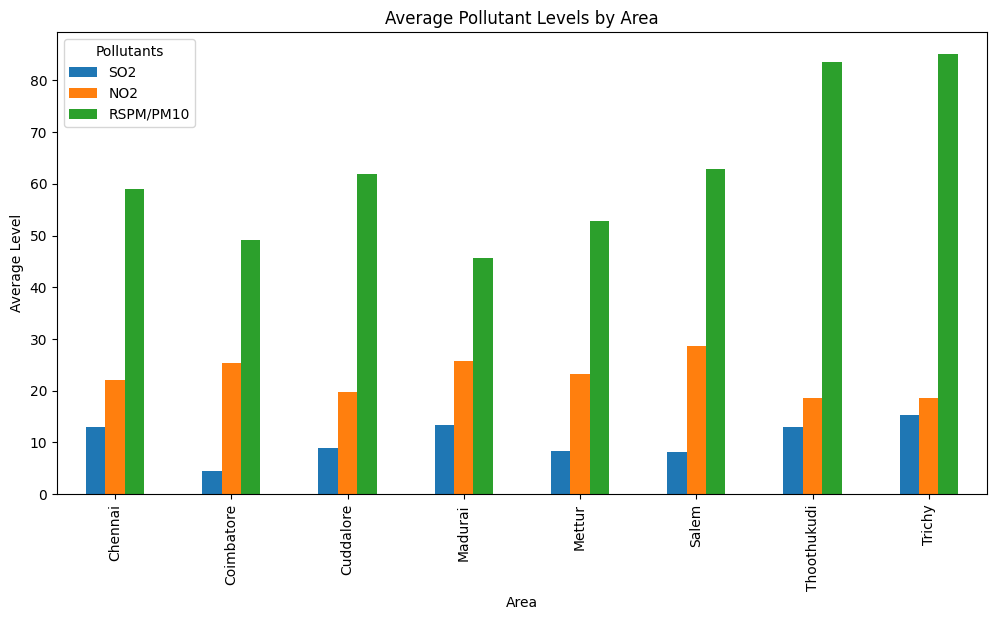

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("data.csv")  # Replace with your actual data file

# List of pollutants to analyze
pollutants = ['SO2', 'NO2', 'RSPM/PM10']

# Group the data by the 'City/Town/Village/Area' column and calculate the average levels
grouped_data = data.groupby('City/Town/Village/Area')[pollutants].mean()

# Create a bar graph to visualize the average pollutant levels
grouped_data.plot(kind='bar', figsize=(12, 6))
plt.title("Average Pollutant Levels by Area")
plt.xlabel("Area")
plt.ylabel("Average Level")
plt.legend(title='Pollutants', loc='upper left')

# Show the graph
plt.show()
